# Description
数据集500_Person_Gender_Height_Weight.csv中包含了500份数据，数据的构成如下所示：


|  | Gender | Height | Weight
|:---:|:---:|:---:|:---:|
| Sample1 | Male | 174 | 96 |
| Sample2 | Female | 185 | 110 |

其中第一列表示性别，第二列表示身高，第三列表示体重，试用贝叶斯分类器构建分类器，根据身高和体重区分样本的性别。

## Requirements
1. 构造贝叶斯分类器
2. 可视化贝叶斯分类器决策面
3. 预测身高为180体重为120的样本的性别
4. 完成实验报告

# Solution
## Pre-processing data

In [112]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('traindata.csv', sep=',').dropna() # drop nan rows

male = df_train.loc[df_train['gender']=='Male'].iloc[:,1:3].to_numpy() # male matrix
female = df_train.loc[df_train['gender']=='Female'].iloc[:,1:3].to_numpy() # female matrix

n_male = len(male) # number of male saples
n_female = len(female) # number of female saples

## Visualizing Data

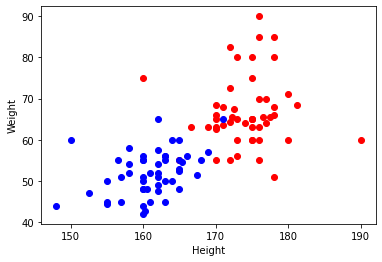

In [113]:
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x=male[:,0],y=male[:,1], c={'red':'male'})
plt.scatter(x=female[:,0],y=female[:,1],  c={'blue':'Female'})

## Calculating mean and variance

In [114]:
def calc_param(feature):
  height_mean = feature[:,0].mean()
  weight_mean = feature[:,1].mean()
  cov = np.cov(feature.T)
  height_std = np.sqrt(feature[0][0])
  weight_std = np.sqrt(feature[1][1])
  return height_mean, weight_mean, cov, height_std, weight_std

In [115]:
male_height_mean, male_weight_mean, cov_male, male_height_std, male_weight_std = calc_param(male)
female_height_mean, female_weight_mean, cov_female, female_height_std, female_weight_std = calc_param(female)

## Bayes Estimation

In [116]:
fitted_male_height_mean =  (1 / (n_male + male_height_std ** 2)) * (male[:,0].sum())
fitted_female_height_mean =  (1 / (n_female + female_height_std ** 2)) * (female[:,0].sum())
fitted_male_weight_mean =  (1 / (n_male + male_weight_std ** 2)) * (male[:,1].sum())
fitted_female_weight_mean =  (1 / (n_female + female_weight_std ** 2)) * (female[:,1].sum())

In [117]:
import math
def predict(x, mean_male, mean_female, sig_male, sig_female, P_male, P_famale):
  return 0.5 * (np.dot(np.dot((x-mean_male).T,np.linalg.inv(sig_male)), (x-mean_male))-\
        np.dot(np.dot((x-mean_female).T,np.linalg.inv(sig_female)), (x-mean_female))) +\
        0.5 * math.log(np.linalg.det(sig_male)/np.linalg.det(sig_female)) - math.log(P_male/P_famale)

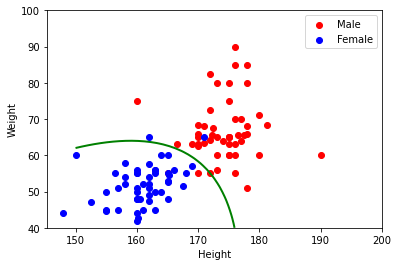

In [118]:
prior_male = len(male)/(len(male) + len(female))
prior_female = 1 - prior_male
mean_male = np.array([male_height_mean, male_weight_mean]).reshape(-1,1)
mean_female = np.array([female_height_mean, female_weight_mean]).reshape(-1,1)

sample_height = np.linspace(150,200,50) # 构建50*50的一个待检测区域
sample_weight = np.linspace(40,100,50)

sample = np.zeros((50, 50))

for i in range(50):
  for j in range(50):
    x = np.array([sample_height[i],sample_weight[j]]).reshape(-1,1)
    sample[i,j] = predict(x,mean_male,mean_female,cov_male,cov_female,prior_male,prior_female)

plt.contour(sample_height, sample_weight, sample, 0, colors = 'green',linewidths=2)
# 画待区分的点
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x=male[:,0],y=male[:,1], c={'red':'Male'})
plt.scatter(x=female[:,0],y=female[:,1],  c={'blue':'Female'})
plt.legend(['Male','Female'])